# Dhruv Morzaria  ----- djm697 Statistical Arbitrage Final Project

Importing Libraries

In [16]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
from statsmodels.api import OLS

Loading Data

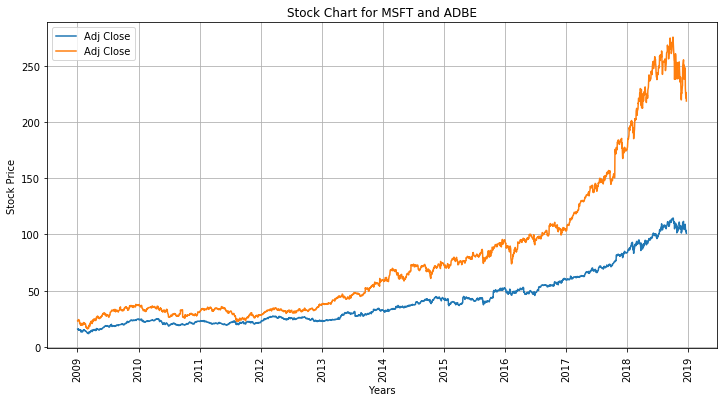

In [17]:
tickers = (['AAPL','ACN','ADBE','ADSK','AKAM','CSCO','CTSH','CTXS','EA','EBAY','FFIV','GOOG','HPQ','HRS','IBM','INTC',
            'JNPR','MA','MSFT','MSI','NTAP','NVDA','ORCL','QCOM','STX','SYMC','TXN','V','XLNX','XRX'])
for tick in tickers:
    vars()[tick] = pd.read_csv('Data/' + tick + '.csv',
                               index_col='Date',na_values=0,keep_default_na=True)
    #print(vars()[tick].shape)    

    

#xvalues = ['2010','2011', '2012', '2013', '2014', '2015', '2016', '2017','2018']

#MSFT['Adj Close'].plot(figsize=(12,4),label='MSFT')
#ADBE['Adj Close'].plot(figsize=(12,4),label='ADBE')
#plt.legend()




X_INDEX_new = pd.to_datetime(MSFT['Adj Close'].index)
plt.figure(figsize=(12,6))
plt.plot(X_INDEX_new, MSFT['Adj Close'])
plt.plot(X_INDEX_new, ADBE['Adj Close'])
plt.ylabel('Stock Price')
plt.title('Stock Chart for MSFT and ADBE')
plt.xlabel('Years')
plt.xticks(rotation = 90)
plt.legend()
plt.grid()
plt.show()

 
 
 
 
 
 
Cleaning the Data(Droping NANs) and Normalizing the Adj Close Prices for each Stock

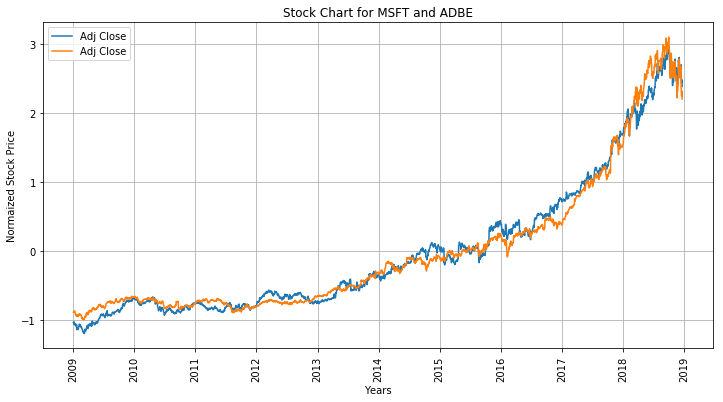

In [18]:
for tick in tickers:
    vars()[tick].dropna(axis = 0, inplace = True)
    vars()[tick]['Adj Close'] = (vars()[tick]['Adj Close'] - statistics.mean(vars()[tick]['Adj Close']))/statistics.stdev(vars()[tick]['Adj Close']) 
    #print(vars()[tick].shape)
#AAPL['Adj Close'][2259:]




X_INDEX_new = pd.to_datetime(MSFT['Adj Close'].index)
plt.figure(figsize=(12,6))
plt.plot(X_INDEX_new, MSFT['Adj Close'])
plt.plot(X_INDEX_new, ADBE['Adj Close'])
plt.ylabel('Normaized Stock Price')
plt.title('Stock Chart for MSFT and ADBE')
plt.xlabel('Years')
plt.xticks(rotation = 90)
plt.legend()
plt.grid()
plt.show()

Slicing the data for making separate Traning and Testing sets

In [19]:
for tick in tickers:
    vars()[tick + 'test'] = vars()[tick].reset_index()[['Date','Adj Close']][2259:]
    vars()[tick + 'test'] = vars()[tick + 'test'].set_index('Date')
    vars()[tick]['Adj Close'] = vars()[tick]['Adj Close'][:2259]
    vars()[tick].dropna(axis = 0, inplace = True)

MSFTtest.tail()

,Adj Close
Date,
2018-12-14,2.562466
2018-12-17,2.437239
2018-12-18,2.480311
2018-12-19,2.469144
2018-12-20,2.382203


We will have 2 stage screening

1. Correlation
2. Co-integration

### First Screening: Using Correlation between two Stock Prices
    
    
Identifying the Stock Pairs which show corellatin more than 0.9

Making a Correlation Matrix

In [20]:
dtframe = pd.DataFrame(index=tickers,columns=tickers)
ll = []
for t in tickers:
    for i in range(len(tickers)):
        temp = tickers[i]
        dtframe[t][temp] = vars()[t]['Adj Close'].corr(vars()[temp]['Adj Close'])
dtframe

,AAPL,ACN,ADBE,ADSK,AKAM,CSCO,CTSH,CTXS,EA,EBAY,...,NTAP,NVDA,ORCL,QCOM,STX,SYMC,TXN,V,XLNX,XRX
AAPL,1,0.952643,0.933013,0.917791,0.763594,0.878107,0.935745,0.771089,0.906105,0.938602,...,0.271667,0.74386,0.93948,0.646903,0.787041,0.867767,0.946999,0.965853,0.928716,0.658514
ACN,0.952643,1,0.949916,0.91073,0.713204,0.890555,0.929518,0.809536,0.922666,0.960945,...,0.235382,0.768321,0.924815,0.615701,0.708737,0.885231,0.96697,0.985353,0.958171,0.576821
ADBE,0.933013,0.949916,1,0.958893,0.631388,0.938197,0.868669,0.734059,0.96633,0.899193,...,0.244889,0.883087,0.874817,0.484943,0.639223,0.921517,0.981484,0.965717,0.938122,0.594346
ADSK,0.917791,0.91073,0.958893,1,0.610628,0.868786,0.863154,0.807694,0.913533,0.888074,...,0.434034,0.906988,0.900156,0.53021,0.631457,0.932717,0.965323,0.910631,0.942426,0.648778
AKAM,0.763594,0.713204,0.631388,0.610628,1,0.697498,0.819323,0.54691,0.597912,0.71685,...,0.351469,0.315836,0.776746,0.677213,0.815325,0.566847,0.683723,0.728273,0.683387,0.757218
CSCO,0.878107,0.890555,0.938197,0.868786,0.697498,1,0.812673,0.638241,0.91688,0.840591,...,0.209301,0.779165,0.809599,0.441284,0.657695,0.880199,0.928827,0.921036,0.85725,0.622616
CTSH,0.935745,0.929518,0.868669,0.863154,0.819323,0.812673,1,0.780069,0.846321,0.903354,...,0.366793,0.633284,0.95086,0.653612,0.752701,0.771543,0.897152,0.92306,0.90314,0.722829
CTXS,0.771089,0.809536,0.734059,0.807694,0.54691,0.638241,0.780069,1,0.69987,0.815625,...,0.557272,0.693477,0.798342,0.529938,0.482613,0.746832,0.796913,0.736256,0.820849,0.458573
EA,0.906105,0.922666,0.96633,0.913533,0.597912,0.91688,0.846321,0.69987,1,0.848151,...,0.159817,0.855423,0.821575,0.36832,0.543444,0.884733,0.949993,0.937921,0.878757,0.524278
EBAY,0.938602,0.960945,0.899193,0.888074,0.71685,0.840591,0.903354,0.815625,0.848151,1,...,0.290141,0.723537,0.928847,0.69973,0.781294,0.888562,0.924155,0.953314,0.95696,0.584716


Identifying the Stock Pairs which show corellation more than 0.9

In [21]:
rows, cols = np.where(dtframe > 0.9) 
t1 = [] 
t2 = []

for i in rows:
    t1.append(tickers[i])
for i in cols:
    t2.append(tickers[i])        

pair = list(zip(t1,t2))
print(len(pair))
pairs = []
for i in range(len(pair)):
    if pair[i][0] != pair[i][1]:
        pairs.append(pair[i])
print(len(pairs))

298
268


Out of total 435 possible Stock Pairs(for 30 stocks), after first stage of screening, we have 268 pairs remaining

### Second Screening:
The second screening of the stock pairs will be done by checking whether they are cointegrated or not.
We calculate the residuals and check whether this residual are mean reverting.

Test for Mean Reversion:
1. Augmented Dicker Fuller Test for checking for unit roots
2. Using Hurst Exponent for Testing for Stationarity of time series (and thereby, checking for Mean Reversion)

In [22]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

def cointegration_test(y, x):
    # Step 1: regress on variable on the other 
    ols_result = sm.OLS(y, x).fit() 
    
    # Step 2: obtain the residual (ols_resuld.resid)
    #print(ols_resuld.resid)
    
    # Step 3: apply Augmented Dickey-Fuller test to see whether the residual is unit root    
    return ts.adfuller(ols_result.resid)

Perforning Co-integration Test for one pair - Company Apple and Accenture (as an example), before screening all the pairs 

In [23]:
y = AAPL['Adj Close']
x = ACN['Adj Close']

result1 = cointegration_test(y, x)
result1

(-2.536340837697133,
 0.1068806804181795,
 0,
 2258,
 {'1%': -3.4332493576580534,
  '10%': -2.567451861834038,
  '5%': -2.862820860480031},
 -10074.639408201881)

Here is the output of the Augmented Dickey-Fuller test for Residuals over the period. The first value is the calculated 
test-statistic, while the second value is the p-value. The fourth is the number of data points in the sample. 
The fifth value, the dictionary, contains the critical values of the test-statistic at the 1, 5 and 10 percent values
respectively.

Since the calculated value of the test statistic is "LARGER" than any of the critical values at the 1, 5 or 10 percent levels, we cannot reject the null hypothesis of γ=0 and thus we are unlikely to have found a mean reverting time series.
____________________________________________________________________________________________________________________

#### Performing Co-Integration Test on all the pairs left after Screening 1 

In [24]:
coinlist = []
#coincoeff = []
for i in pairs:
    y = vars()[i[0]]['Adj Close']
    x = vars()[i[1]]['Adj Close']
    result2 = cointegration_test(y, x)
    coinlist.append(result2)
    #coineff.append()
#coinlist
len(coinlist)

268

Now, we have list of results of ADF Test for all the 268 pairs.

We we do hypothesis testing for each result and check if we can reject or not reject null hypothesis.

(Null Hypothesis: γ=0)

If we cannot reject Null Hypothesis , the residual series is not mean reverting.
Otherwise, the residual series in mean reverting.


------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

In [25]:
coincoeff = []
index = []
for i in coinlist:
    if i[1] < 0.05:  # Using P Value #confidence level/Level of Significance
        index.append(coinlist.index(i))
        coincoeff.append(i[0])
#print(len(index))
#print(len(coincoeff))

finallist = []
for i in index:
    finallist.append((pairs[i]))

#print(len(finallist))
print('Stock Pairs remaining after second screening: ')
print(finallist)
print('\n')
print('Corresponding Co-efficient for the pairs:')
print(coincoeff)

Stock Pairs remaining after second screening: 
[('AAPL', 'INTC'), ('AAPL', 'ORCL'), ('ACN', 'EBAY'), ('ACN', 'GOOG'), ('ACN', 'MA'), ('ACN', 'MSI'), ('ACN', 'V'), ('ACN', 'XLNX'), ('ADBE', 'CSCO'), ('ADBE', 'GOOG'), ('ADBE', 'HRS'), ('ADBE', 'MSFT'), ('ADBE', 'SYMC'), ('ADBE', 'TXN'), ('ADSK', 'ADBE'), ('ADSK', 'HRS'), ('ADSK', 'INTC'), ('ADSK', 'MSFT'), ('ADSK', 'SYMC'), ('ADSK', 'TXN'), ('ADSK', 'XLNX'), ('CSCO', 'ADBE'), ('CSCO', 'EA'), ('CSCO', 'GOOG'), ('CSCO', 'HRS'), ('CSCO', 'MSFT'), ('CSCO', 'TXN'), ('CTSH', 'AAPL'), ('CTSH', 'MA'), ('CTSH', 'ORCL'), ('CTSH', 'V'), ('EBAY', 'AAPL'), ('EBAY', 'ACN'), ('EBAY', 'GOOG'), ('EBAY', 'MA'), ('EBAY', 'MSI'), ('EBAY', 'ORCL'), ('EBAY', 'V'), ('EBAY', 'XLNX'), ('GOOG', 'ACN'), ('GOOG', 'ADBE'), ('GOOG', 'HRS'), ('GOOG', 'MA'), ('GOOG', 'MSFT'), ('GOOG', 'V'), ('GOOG', 'XLNX'), ('HRS', 'ADBE'), ('HRS', 'ADSK'), ('HRS', 'CSCO'), ('HRS', 'GOOG'), ('HRS', 'MSFT'), ('HRS', 'TXN'), ('INTC', 'AAPL'), ('INTC', 'HRS'), ('INTC', 'MSFT'), ('INTC', 

In [26]:
arg0 = []
for i in range(len(coincoeff)):
    temp =[]
    temp.append(finallist[i])
    temp.append(coincoeff[i])
    arg0.append(temp)
#print(arg0)

# Sort the list by integer values
arg0.sort(key=lambda x: x[1])

for i in range(len(arg0)):
    temp =  list(arg0[i][0])
    temp = sorted(temp)
    arg0[i][0] = temp
    
    
    

arg = []
for i in range(len(arg0)):
    if  (arg0[i][0][0] != arg0[i][0][1]):
        arg.append(arg0[i])
arg

[[['ADBE', 'MSFT'], -4.853696840127012],
 [['ADBE', 'MSFT'], -4.7605068750407415],
 [['EBAY', 'MSI'], -4.712931477116918],
 [['EBAY', 'MSI'], -4.528869373056602],
 [['HRS', 'MSFT'], -4.248439613748239],
 [['MSI', 'XLNX'], -4.244170539502092],
 [['ADBE', 'HRS'], -4.234081866080411],
 [['HRS', 'MSFT'], -4.141122461188372],
 [['MSI', 'XLNX'], -4.10840948207096],
 [['HRS', 'TXN'], -4.025810286511246],
 [['HRS', 'TXN'], -3.9890608692782963],
 [['ADBE', 'HRS'], -3.9868831793499973],
 [['EBAY', 'XLNX'], -3.9377120991413315],
 [['EBAY', 'XLNX'], -3.9255632679904484],
 [['ADSK', 'SYMC'], -3.913832286815465],
 [['MSFT', 'TXN'], -3.8718623796618012],
 [['ADSK', 'SYMC'], -3.789768464093104],
 [['CTSH', 'ORCL'], -3.785248835335275],
 [['CTSH', 'ORCL'], -3.7628244229142815],
 [['ADBE', 'TXN'], -3.745774343386526],
 [['GOOG', 'XLNX'], -3.702758200539927],
 [['AAPL', 'ORCL'], -3.6724072062120325],
 [['ORCL', 'XLNX'], -3.6711722495489822],
 [['ACN', 'GOOG'], -3.615242470087113],
 [['ACN', 'GOOG'], -3.6

In [27]:
final_arg = []
temp_dict = {}
for element in arg:
    temp_str = element[0][0] + ',' + element[0][1]
    if(temp_str not in temp_dict):
        temp_arg = []
        temp_dict[temp_str] = element[1]

sorted_temp_dict = sorted(temp_dict.items(), key = lambda x:x[1])
#print(sorted_temp_dict)

for element in sorted_temp_dict:
    temp_list = element[0].split(',')
    temp_list.append([element[1]])
    #print(temp_list)
    final_arg.append(temp_list)
    
print(final_arg)

arg = final_arg
    
        

[['ADBE', 'MSFT', [-4.853696840127012]], ['EBAY', 'MSI', [-4.712931477116918]], ['HRS', 'MSFT', [-4.248439613748239]], ['MSI', 'XLNX', [-4.244170539502092]], ['ADBE', 'HRS', [-4.234081866080411]], ['HRS', 'TXN', [-4.025810286511246]], ['EBAY', 'XLNX', [-3.9377120991413315]], ['ADSK', 'SYMC', [-3.913832286815465]], ['MSFT', 'TXN', [-3.8718623796618012]], ['CTSH', 'ORCL', [-3.785248835335275]], ['ADBE', 'TXN', [-3.745774343386526]], ['GOOG', 'XLNX', [-3.702758200539927]], ['AAPL', 'ORCL', [-3.6724072062120325]], ['ORCL', 'XLNX', [-3.6711722495489822]], ['ACN', 'GOOG', [-3.615242470087113]], ['MSI', 'ORCL', [-3.592184029309351]], ['ACN', 'MSI', [-3.587800488388814]], ['ACN', 'EBAY', [-3.567349629165358]], ['ACN', 'V', [-3.5649759153708396]], ['ADBE', 'CSCO', [-3.547929781172918]], ['GOOG', 'HRS', [-3.4767307357133177]], ['EBAY', 'ORCL', [-3.4627140473801092]], ['ADSK', 'TXN', [-3.4495399790092725]], ['ACN', 'XLNX', [-3.440173168883615]], ['EBAY', 'MA', [-3.428614502301113]], ['GOOG', 'V',

In [29]:

arg = arg[:20]
arg


[['ADBE', 'MSFT', [-4.853696840127012]],
 ['EBAY', 'MSI', [-4.712931477116918]],
 ['HRS', 'MSFT', [-4.248439613748239]],
 ['MSI', 'XLNX', [-4.244170539502092]],
 ['ADBE', 'HRS', [-4.234081866080411]],
 ['HRS', 'TXN', [-4.025810286511246]],
 ['EBAY', 'XLNX', [-3.9377120991413315]],
 ['ADSK', 'SYMC', [-3.913832286815465]],
 ['MSFT', 'TXN', [-3.8718623796618012]],
 ['CTSH', 'ORCL', [-3.785248835335275]],
 ['ADBE', 'TXN', [-3.745774343386526]],
 ['GOOG', 'XLNX', [-3.702758200539927]],
 ['AAPL', 'ORCL', [-3.6724072062120325]],
 ['ORCL', 'XLNX', [-3.6711722495489822]],
 ['ACN', 'GOOG', [-3.615242470087113]],
 ['MSI', 'ORCL', [-3.592184029309351]],
 ['ACN', 'MSI', [-3.587800488388814]],
 ['ACN', 'EBAY', [-3.567349629165358]],
 ['ACN', 'V', [-3.5649759153708396]],
 ['ADBE', 'CSCO', [-3.547929781172918]]]

The above list of pairs are the ones which have passes both the stages of screening.
The residuals of above pair have shown "Mean Reverting Property"

Now, we will write two function which will be used for plotting

In [30]:
def plot_scatter_series(df, ts1, ts2):
    plt.xlabel('%s Price ($)' % ts1)
    plt.ylabel('%s Price ($)' % ts2)
    plt.title('%s and %s Price Scatterplot' % (ts1, ts2))
    plt.scatter(df[ts1], df[ts2])
    plt.grid()
    plt.show()
    
def plottingfunc(residualdf,script1,script2):
    std1 = []
    std2 = []
    std3 = []
    std4 = []
    std1n = []
    std2n = []
    std3n = []
    std4n = []
    zeroline = []
    means = []
    for i in range(len(residualdf["res"].index)):
        std1.append(1 * statistics.stdev(residualdf["res"]))
        std1n.append(-1 * statistics.stdev(residualdf["res"]))
        std2.append(2 * statistics.stdev(residualdf["res"]))
        std2n.append(-2 * statistics.stdev(residualdf["res"]))
        std3.append(3 * statistics.stdev(residualdf["res"]))
        std3n.append(-3 * statistics.stdev(residualdf["res"]))
        std4.append(4 * statistics.stdev(residualdf["res"]))
        std4n.append(-4 * statistics.stdev(residualdf["res"]))
        means.append(statistics.mean(residualdf["res"]))
        zeroline.append(0)

        plt.figure(figsize=(12,6))
        plt.plot(residualdf["res"].index, residualdf["res"])
        plt.ylabel('Residual units')
        plt.title('Residual chart for stock pairs'+script1 + 'and' + script2)
        plt.xlabel('Years')
        plt.xticks(rotation = 90)
        plt.plot(residualdf["res"].index, std1, color = 'green', label = '1 SD')
        plt.plot(residualdf["res"].index, std1n, color = 'green')
        plt.plot(residualdf["res"].index, std2, color = 'blue', label = '2 SD')
        plt.plot(residualdf["res"].index, std2n, color = 'blue')
        plt.plot(residualdf["res"].index, std3, color = 'cyan', label = '3 SD')
        plt.plot(residualdf["res"].index, std3n, color = 'cyan')
        plt.plot(residualdf["res"].index, std4, color = 'red', label = '4 SD')
        plt.plot(residualdf["res"].index, std4n, color = 'red')
        plt.plot(residualdf["res"].index, means, color = 'black', label = 'Mean')
        plt.plot(residualdf["res"].index, zeroline, color = 'yellow', label = 'Zero Line')
        plt.legend()
        plt.show()

###  Calculation Hedge Ratios using Ordinary Least Square Method

In [31]:
p = [] 
residualdf = pd.DataFrame()
def hedgeratios(script1,script2,string1,string2):
    
    dframe = pd.DataFrame(index=HRS.index)
    dframe["Script 1"] = script1['Adj Close']
    dframe["Script 2"] = script2['Adj Close']

    plot_scatter_series(dframe, "Script 1", "Script 2")
    
    y = dframe["Script 1"]
    x = dframe["Script 2"]
    
    res = sm.OLS(y,x).fit()
    beta_hr = res.params
    print('The Hedge Ratio for this pair is : ')
    print(string1,string2)
    print(' 1:',beta_hr[0])
    print('\n------------------------------')  
    
    # Calculate the residuals of the linear combination
    val = dframe["Script 2"].multiply(beta_hr.values[0])
    dframe["res"] = dframe["Script 1"] - (val)
    
    
    
    script = string1 + '-' + string2
    p.append(script)
    # Make Dataframe for all the pairs
    residualdf[script] = dframe["res"]
    
    
    # Calculate and output the CADF test on the residuals
    cadf = ts.adfuller(dframe["res"],)
    pprint.pprint(cadf)
    X_INDEX = pd.to_datetime(dframe["res"].index)
    
    
    #Plotting the Resisuals
    std1 = []
    std2 = []
    std3 = []
    std4 = []
    std1n = []
    std2n = []
    std3n = []
    std4n = []
    zeroline = []
    means = []
    for i in range(len(dframe["res"].index)):
        std1.append(1 * statistics.stdev(dframe["res"]))
        std1n.append(-1 * statistics.stdev(dframe["res"]))
        std2.append(2 * statistics.stdev(dframe["res"]))
        std2n.append(-2 * statistics.stdev(dframe["res"]))
        std3.append(3 * statistics.stdev(dframe["res"]))
        std3n.append(-3 * statistics.stdev(dframe["res"]))
        std4.append(4 * statistics.stdev(dframe["res"]))
        std4n.append(-4 * statistics.stdev(dframe["res"]))
        means.append(statistics.mean(dframe["res"]))
        zeroline.append(0)
    X_INDEX_new = pd.to_datetime(dframe["res"].index)
    plt.figure(figsize=(10,6))
    plt.plot(X_INDEX, dframe["res"])
    plt.ylabel('Residual units')
    plt.title('Residual chart for stock pairs')
    plt.xlabel('Years')
    plt.xticks(rotation = 90)
    plt.plot(X_INDEX, std1, color = 'green', label = '1 SD')
    plt.plot(X_INDEX, std1n, color = 'green')
    plt.plot(X_INDEX, std2, color = 'blue', label = '2 SD')
    plt.plot(X_INDEX, std2n, color = 'blue')
    plt.plot(X_INDEX, std3, color = 'cyan', label = '3 SD')
    plt.plot(X_INDEX, std3n, color = 'cyan')
    plt.plot(X_INDEX, std4, color = 'red', label = '4 SD')
    plt.plot(X_INDEX, std4n, color = 'red')
    plt.plot(X_INDEX, means, color = 'black', label = 'Mean')
    plt.plot(X_INDEX, zeroline, color = 'yellow', label = 'Zero Line')
    plt.legend()
    plt.show()

Applying the above functions for all the Stock Pairs 

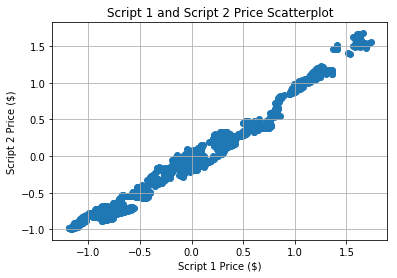

The Hedge Ratio for this pair is : 
MSFT ADBE
 1: 1.0669542064561566

------------------------------
(-4.7605068750407415,
 6.467992985355663e-05,
 0,
 2258,
 {'1%': -3.4332493576580534,
  '10%': -2.567451861834038,
  '5%': -2.862820860480031},
 -11137.602092154022)


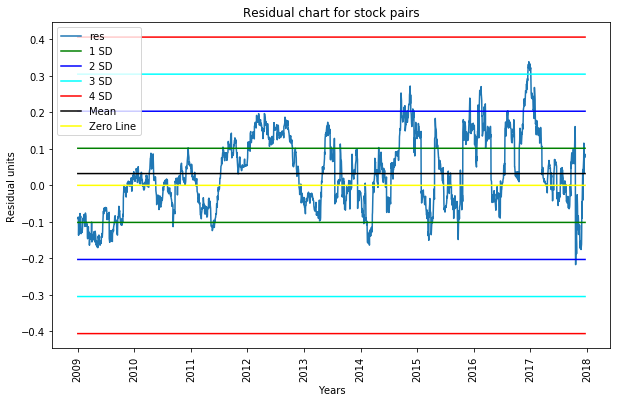

In [32]:
hedgeratios(MSFT,ADBE,'MSFT','ADBE')

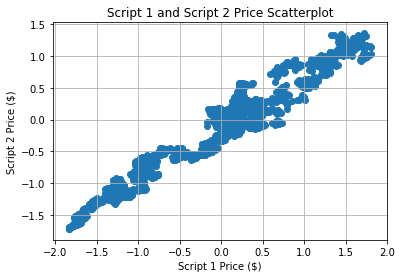

The Hedge Ratio for this pair is : 
EBAY MSI
 1: 1.1494070727592245

------------------------------
(-4.528869373056602,
 0.00017432303228555562,
 0,
 2258,
 {'1%': -3.4332493576580534,
  '10%': -2.567451861834038,
  '5%': -2.862820860480031},
 -7927.842476821468)


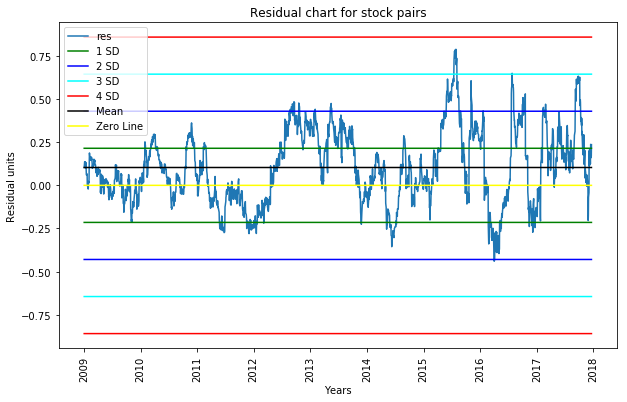

In [33]:
hedgeratios(EBAY,MSI,'EBAY','MSI')

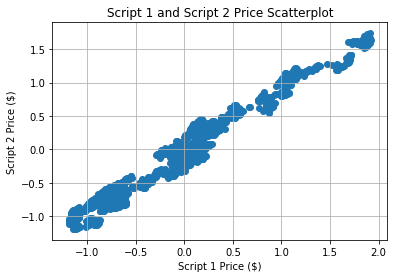

The Hedge Ratio for this pair is : 
HRS MSI
 1: 1.0426135893751507

------------------------------
(-4.141122461188372,
 0.0008275586619412823,
 0,
 2258,
 {'1%': -3.4332493576580534,
  '10%': -2.567451861834038,
  '5%': -2.862820860480031},
 -10492.62769644515)


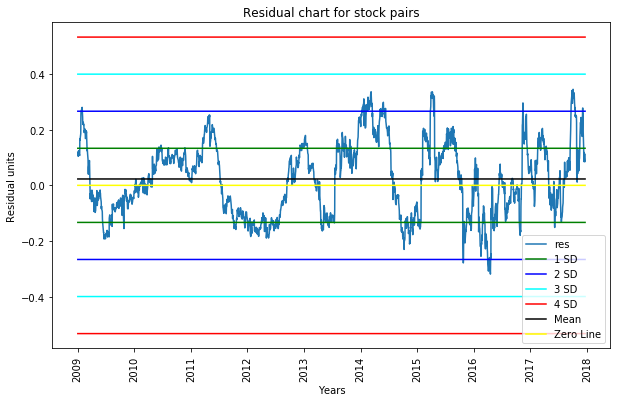

In [34]:
hedgeratios(HRS,MSFT,'HRS','MSI')

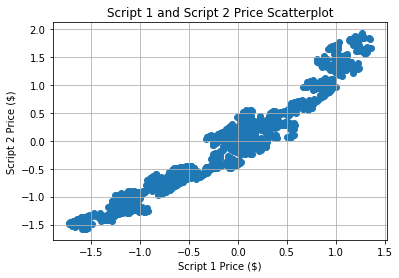

The Hedge Ratio for this pair is : 
MSI XLNX
 1: 0.9050969856578748

------------------------------
(-4.244170539502092,
 0.0005542009075463701,
 0,
 2258,
 {'1%': -3.4332493576580534,
  '10%': -2.567451861834038,
  '5%': -2.862820860480031},
 -9051.113728338041)


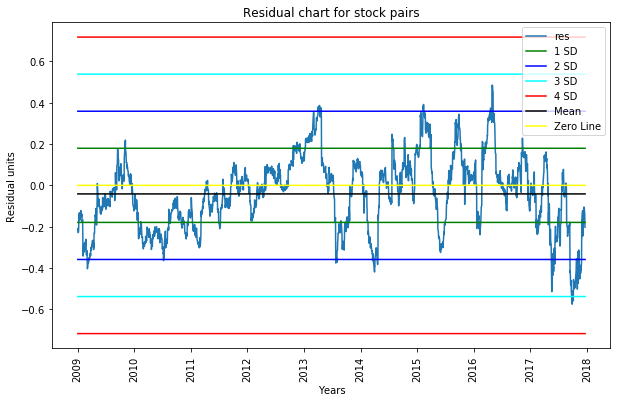

In [35]:
hedgeratios(MSI,XLNX,'MSI','XLNX')

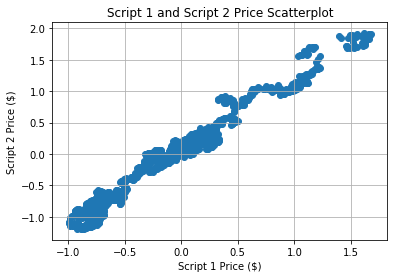

The Hedge Ratio for this pair is : 
ADBE HRS
 1: 0.8589695235442579

------------------------------
(-4.234081866080411,
 0.0005766330923236346,
 26,
 2232,
 {'1%': -3.4332831704990503,
  '10%': -2.5674598111615343,
  '5%': -2.862835790766408},
 -11243.44261225787)


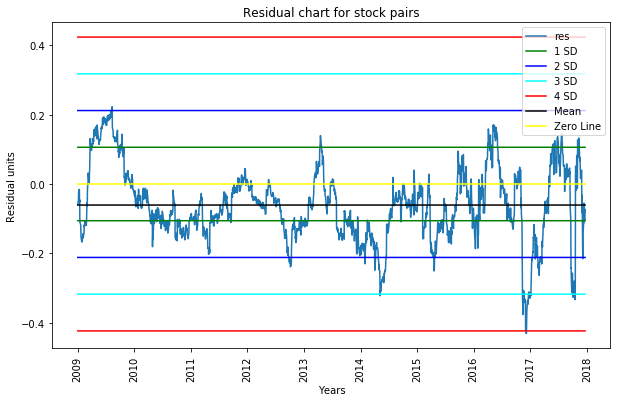

In [36]:
hedgeratios(ADBE,HRS,'ADBE','HRS')

Above is the List of 5 Pairs which have mean revsion property (according ADF test). 
Now, we use C-ADF, Cointegrated Augmented Dickey Fuller Test for getting the Hedge Ratios.

### Trading Strategy

Taking into account the following Parameters

1. Trading Frequency

3. Success Ratio/Hit Ratio

2. Varying Risk Levels by varying Standard Deviation
    
    Changing the Standard Deviation by changing the instances at which the the strategy opens and closes its position. 
    

In [37]:
netpnl = []
def tradingrules(mean, standev, residual, openstdev, closestdev, stoploss):
    dic = {'Standard Deviation:':0,'Trading Frequency:':0,'Holding Period in Days:':0}
    numerator = 0
    denominator = 0
    
    maxdrawdown = []
    finaldrawdown = 0
    i=0
    alreadybreak = False
    flagupper = False
    flagopen = False
    profit = 0
    loss = 0
    while i < residual.size:
        #print('1',i)
        flagupper = False
        if ((abs(residual[i]) > (openstdev * standev)) and not flagupper):
            flagupper = True
            while i < residual.size:
                #print('2',i)
                if alreadybreak:
                    alreadybreak = False
                    break
                else:
                    #print('3',i)
                    if ((abs(residual[i]) < (openstdev * standev)) and not flagopen):
                        # Position open
                        #print('open', residual.index[i])
                        flagopen = True
                        flagupper = False
                        drawdownlist = []
                        drawdownlist.append(abs(residual[i]))
                        while i < residual.size:
                            #print('4',i)
                            if ((abs(residual[i]) < (closestdev*standev)) and flagopen):
                                profit = profit + mean * (openstdev*standev - closestdev*standev)
                                dic['Trading Frequency:'] = dic['Trading Frequency:']+1
                                i = i +1
                                numerator = numerator +1
                                flagopen = False
                                alreadybreak = True
                                maxdrawdown.append(max(drawdownlist))
                                #print('Close with profit', residual.index[i])
                                break
                                print(i)
                            elif ((abs(residual[i]) > (stoploss*statistics.stdev(residual))) and flagopen):
                                loss = loss + mean*(stoploss*standev - openstdev*standev)
                                dic['Trading Frequency:'] = dic['Trading Frequency:']+1
                                flagopen = False
                                flagupper = True
                                i = i +1
                                denominator = denominator +1
                                alreadybreak = True
                                maxdrawdown.append(max(drawdownlist))
                                #print('Close with stop loss', residual.index[i])
                                break  
                            i = i +1
                i= i +1                                   
        i = i+1  
    netpnl.append(profit - loss)
    print('\n\nStandard Deviation considered are: Trading Postion Opens at- ', openstdev, ', Trading Postion Closes at '
         ,closestdev, ', Trading Postion Closes if it breaches ',stoploss,' to avoid further loss.')
    print('\nTrading Frequency: ', dic['Trading Frequency:'])
    if dic['Trading Frequency:'] ==0:
        print('Stock Pairs did not trade due low volatility. we have set high Open standard Deviation for Positon toopen')
        return ((profit - loss))
    else:
        print('Success Ratio: ' , numerator/(numerator + denominator))
        print('Maximum Drawdown:',max(maxdrawdown))
        print('Net P/L: ' , ((profit - loss) + 1))
        print('Average P/L:', (profit - loss)/residual.size)
        return ((profit - loss) + 1)

In [38]:
ff = [] 
opendevlist = [2,2.5,3]
closedevlist =[0.5,1,1.5]

for i in opendevlist:
    for j in closedevlist:
        tempo = []
        for pr in p:
            a = tradingrules(residual=residualdf[pr],mean=np.mean(residualdf[pr]),standev=np.std(residualdf[pr]),openstdev=i,
                         closestdev=j,stoploss=(i+(i-j)))
            tempo.append(a)
            
            print('----------------------------------------------------------------------------------------------')
        ff.append(tempo)




Standard Deviation considered are: Trading Postion Opens at-  2 , Trading Postion Closes at  0.5 , Trading Postion Closes if it breaches  3.5  to avoid further loss.

Trading Frequency:  6
Success Ratio:  1.0
Maximum Drawdown: 0.2026992247500522
Net P/L:  1.0294969781273962
Average P/L: 1.3057537905000507e-05
----------------------------------------------------------------------------------------------


Standard Deviation considered are: Trading Postion Opens at-  2 , Trading Postion Closes at  0.5 , Trading Postion Closes if it breaches  3.5  to avoid further loss.

Trading Frequency:  9
Success Ratio:  0.8888888888888888
Maximum Drawdown: 0.4267584714543331
Net P/L:  1.2333170643006368
Average P/L: 0.0001032833396638499
----------------------------------------------------------------------------------------------


Standard Deviation considered are: Trading Postion Opens at-  2 , Trading Postion Closes at  0.5 , Trading Postion Closes if it breaches  3.5  to avoid further loss.

T



Standard Deviation considered are: Trading Postion Opens at-  2.5 , Trading Postion Closes at  1 , Trading Postion Closes if it breaches  4.0  to avoid further loss.

Trading Frequency:  3
Success Ratio:  1.0
Maximum Drawdown: 0.2512248721766431
Net P/L:  1.014748489063698
Average P/L: 6.528768952500253e-06
----------------------------------------------------------------------------------------------


Standard Deviation considered are: Trading Postion Opens at-  2.5 , Trading Postion Closes at  1 , Trading Postion Closes if it breaches  4.0  to avoid further loss.

Trading Frequency:  4
Success Ratio:  1.0
Maximum Drawdown: 0.5273384300489535
Net P/L:  1.1333240367432211
Average P/L: 5.901905123648566e-05
----------------------------------------------------------------------------------------------


Standard Deviation considered are: Trading Postion Opens at-  2.5 , Trading Postion Closes at  1 , Trading Postion Closes if it breaches  4.0  to avoid further loss.

Trading Frequency:



Standard Deviation considered are: Trading Postion Opens at-  3 , Trading Postion Closes at  1.5 , Trading Postion Closes if it breaches  4.5  to avoid further loss.

Trading Frequency:  2
Success Ratio:  1.0
Maximum Drawdown: 0.6054760582169936
Net P/L:  1.0666620183716105
Average P/L: 2.950952561824283e-05
----------------------------------------------------------------------------------------------


Standard Deviation considered are: Trading Postion Opens at-  3 , Trading Postion Closes at  1.5 , Trading Postion Closes if it breaches  4.5  to avoid further loss.

Trading Frequency:  0
Stock Pairs did not trade due low volatility. we have set high Open standard Deviation for Positon toopen
----------------------------------------------------------------------------------------------


Standard Deviation considered are: Trading Postion Opens at-  3 , Trading Postion Closes at  1.5 , Trading Postion Closes if it breaches  4.5  to avoid further loss.

Trading Frequency:  1
Success Ra

In [39]:
# opendevlist is used for the instance at which the Trading positon is to be opened
# closedevlist is used for the instance at which the Trading positon is to be opened
opendevlist = [2,2.5,3]
closedevlist =[0.5,1,1.5]
w  = 0
for i in opendevlist:
    for j in closedevlist:
        print('\n\nStandard Deviation considered are: Trading Postion Opens at- ', i, ', Trading Postion Closes at '
         ,j, ', Trading Postion Closes if it breaches ',i+(i-j),' to avoid further loss. Net Cummulative Return for all the pairs',np.product(ff[w]) )
        w = w+1



Standard Deviation considered are: Trading Postion Opens at-  2 , Trading Postion Closes at  0.5 , Trading Postion Closes if it breaches  3.5  to avoid further loss. Net Cummulative Return for all the pairs 1.124535291931566


Standard Deviation considered are: Trading Postion Opens at-  2 , Trading Postion Closes at  1 , Trading Postion Closes if it breaches  3  to avoid further loss. Net Cummulative Return for all the pairs 1.117037674146516


Standard Deviation considered are: Trading Postion Opens at-  2 , Trading Postion Closes at  1.5 , Trading Postion Closes if it breaches  2.5  to avoid further loss. Net Cummulative Return for all the pairs 1.0891062004912426


Standard Deviation considered are: Trading Postion Opens at-  2.5 , Trading Postion Closes at  0.5 , Trading Postion Closes if it breaches  4.5  to avoid further loss. Net Cummulative Return for all the pairs 1.1408511241724264


Standard Deviation considered are: Trading Postion Opens at-  2.5 , Trading Postion Closes

Seeingthe above results, our Trading Strategy gives 12% returns on the Training set.
We will now implement it on the testing set.

### Testing Set

---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------
Re-doing the above steps and implementing the Trading Strategy for Testing Period.

The above for loop iterations will help us get OPTIMUM PARAMETERS for Trading Strategy 

In [40]:
############################################################################
# Calculation the Hedge Ratios 

p = [] 
residualdf = pd.DataFrame()
def hedgeratios(script1,script2,string1,string2):
    
    dframe = pd.DataFrame(index=MSFTtest.index)
    dframe["Script 1"] = script1['Adj Close']
    dframe["Script 2"] = script2['Adj Close']

    #plot_scatter_series(dframe, "Script 1", "Script 2")
    
    y = dframe["Script 1"]
    x = dframe["Script 2"]
    
    res = sm.OLS(y,x).fit()
    beta_hr = res.params
    print('The Hedge Ratio for this pair is : ')
    print(string1     ,                      string2)
    print(' 1:',beta_hr[0])
    print('\n------------------------------')
    
    
    # Calculate the residuals of the linear combination
    val = dframe["Script 2"].multiply(beta_hr.values[0])
    dframe["res"] = dframe["Script 1"] - (val)
    
    
    
    script = string1 + '-' + string2
    p.append(script)
    # Make Dataframe for all the pairs
    residualdf[script] = dframe["res"]
    
    
    # Calculate and output the CADF test on the residuals
    cadf = ts.adfuller(dframe["res"],)
    pprint.pprint(cadf)
    X_INDEX = pd.to_datetime(dframe["res"].index)
    
    
    #Plotting the Resisuals
    std1 = []
    std2 = []
    std3 = []
    std4 = []
    std1n = []
    std2n = []
    std3n = []
    std4n = []
    zeroline = []
    means = []
    for i in range(len(dframe["res"].index)):
        std1.append(1 * statistics.stdev(dframe["res"]))
        std1n.append(-1 * statistics.stdev(dframe["res"]))
        std2.append(2 * statistics.stdev(dframe["res"]))
        std2n.append(-2 * statistics.stdev(dframe["res"]))
        std3.append(3 * statistics.stdev(dframe["res"]))
        std3n.append(-3 * statistics.stdev(dframe["res"]))
        std4.append(4 * statistics.stdev(dframe["res"]))
        std4n.append(-4 * statistics.stdev(dframe["res"]))
        means.append(statistics.mean(dframe["res"]))
        zeroline.append(0)
    X_INDEX_new = pd.to_datetime(dframe["res"].index)
    plt.figure(figsize=(10,6))
    plt.plot(X_INDEX, dframe["res"])
    plt.ylabel('Residual units')
    plt.title('Residual chart for stock pairs')
    plt.xlabel('Years')
    plt.xticks(rotation = 90)
    plt.plot(X_INDEX, std1, color = 'green', label = '1 SD')
    plt.plot(X_INDEX, std1n, color = 'green')
    plt.plot(X_INDEX, std2, color = 'blue', label = '2 SD')
    plt.plot(X_INDEX, std2n, color = 'blue')
    plt.plot(X_INDEX, std3, color = 'cyan', label = '3 SD')
    plt.plot(X_INDEX, std3n, color = 'cyan')
    plt.plot(X_INDEX, std4, color = 'red', label = '4 SD')
    plt.plot(X_INDEX, std4n, color = 'red')
    plt.plot(X_INDEX, means, color = 'black', label = 'Mean')
    plt.plot(X_INDEX, zeroline, color = 'yellow', label = 'Zero Line')
    plt.legend()
    plt.show()

The Hedge Ratio for this pair is : 
EBAY MSI
 1: 0.6536051410421987

------------------------------
(-0.5222280588573203,
 0.8876053651117902,
 1,
 249,
 {'1%': -3.4568881317725864,
  '10%': -2.5729936189738876,
  '5%': -2.8732185133016057},
 -552.745365206255)


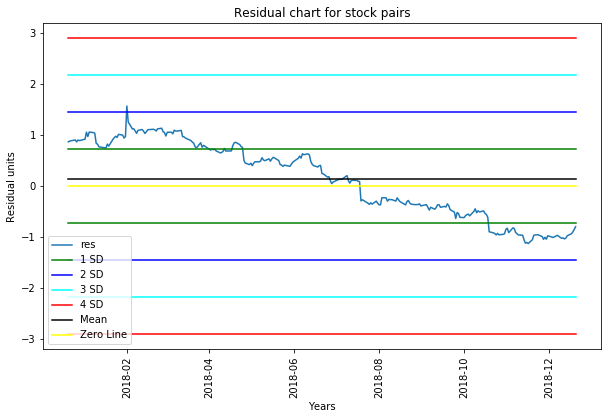

In [41]:
hedgeratios(EBAYtest,MSItest,'EBAY','MSI')


The Hedge Ratio for this pair is : 
HRS MSI
 1: 0.9385623165600936

------------------------------
(-1.2929535662983067,
 0.6323898680363768,
 1,
 249,
 {'1%': -3.4568881317725864,
  '10%': -2.5729936189738876,
  '5%': -2.8732185133016057},
 -533.6758381010166)


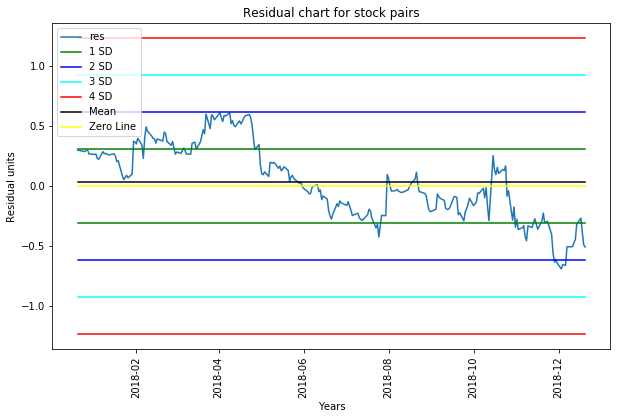

In [42]:
hedgeratios(HRStest,MSFTtest,'HRS','MSI')


The Hedge Ratio for this pair is : 
MSI XLNX
 1: 1.0768305330470498

------------------------------
(-1.8036524170703778,
 0.37864988359841995,
 3,
 247,
 {'1%': -3.457105309726321,
  '10%': -2.5730443824681606,
  '5%': -2.873313676101283},
 -446.2972653860902)


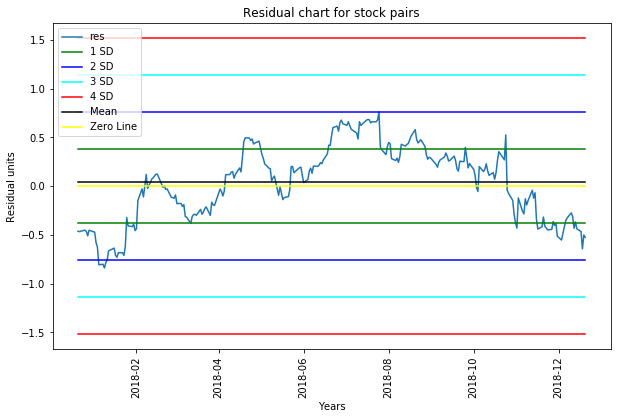

In [43]:
hedgeratios(MSItest,XLNXtest,'MSI','XLNX')


The Hedge Ratio for this pair is : 
ADBE HRS
 1: 1.1033565712746713

------------------------------
(-2.0386967540833076,
 0.26986778406727674,
 1,
 249,
 {'1%': -3.4568881317725864,
  '10%': -2.5729936189738876,
  '5%': -2.8732185133016057},
 -437.3743170100547)


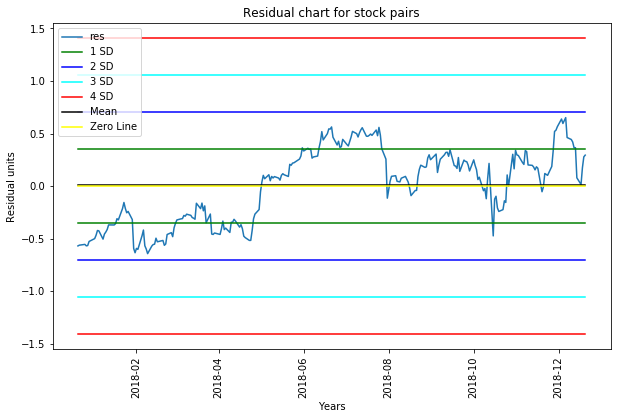

In [44]:
hedgeratios(ADBEtest,HRStest,'ADBE','HRS')

In [45]:
ff1 = [] 
opendevlist = [2,2.5,3]
closedevlist =[0.5,1,1.5]

for i in opendevlist:
    for j in closedevlist:
        tempo = []
        for pr in p:
            a = tradingrules(residual=residualdf[pr],mean=np.mean(residualdf[pr]),standev=np.std(residualdf[pr]),openstdev=i,
                         closestdev=j,stoploss=(i+(i-j)))
            tempo.append(a)
            
            print('----------------------------------------------------------------------------------------------')
        ff1.append(tempo)

        
        
        
#for i in opendevlist:
#    for j in closedevlist:
opendevlist = [2,2.5,3]
closedevlist =[0.5,1,1.5]
w  = 0
for i in opendevlist:
    for j in closedevlist:
        print('\n\nStandard Deviation considered are: Trading Postion Opens at- ', i, ', Trading Postion Closes at '
         ,j, ', Trading Postion Closes if it breaches ',i+(i-j),' to avoid further loss. Net Cummulative for all the pairs',np.product(ff[w]) )
        w = w+1



Standard Deviation considered are: Trading Postion Opens at-  2 , Trading Postion Closes at  0.5 , Trading Postion Closes if it breaches  3.5  to avoid further loss.

Trading Frequency:  1
Success Ratio:  1.0
Maximum Drawdown: 1.2543433615781476
Net P/L:  1.1417159250034212
Average P/L: 0.0005646052788980926
----------------------------------------------------------------------------------------------


Standard Deviation considered are: Trading Postion Opens at-  2 , Trading Postion Closes at  0.5 , Trading Postion Closes if it breaches  3.5  to avoid further loss.

Trading Frequency:  0
Stock Pairs did not trade due low volatility. we have set high Open standard Deviation for Positon toopen
----------------------------------------------------------------------------------------------


Standard Deviation considered are: Trading Postion Opens at-  2 , Trading Postion Closes at  0.5 , Trading Postion Closes if it breaches  3.5  to avoid further loss.

Trading Frequency:  2
Success Ra



Standard Deviation considered are: Trading Postion Opens at-  2.5 , Trading Postion Closes at  1.5 , Trading Postion Closes if it breaches  3.5  to avoid further loss.

Trading Frequency:  0
Stock Pairs did not trade due low volatility. we have set high Open standard Deviation for Positon toopen
----------------------------------------------------------------------------------------------


Standard Deviation considered are: Trading Postion Opens at-  3 , Trading Postion Closes at  0.5 , Trading Postion Closes if it breaches  5.5  to avoid further loss.

Trading Frequency:  0
Stock Pairs did not trade due low volatility. we have set high Open standard Deviation for Positon toopen
----------------------------------------------------------------------------------------------


Standard Deviation considered are: Trading Postion Opens at-  3 , Trading Postion Closes at  0.5 , Trading Postion Closes if it breaches  5.5  to avoid further loss.

Trading Frequency:  0
Stock Pairs did not tra

# S & P Benchmark

In [46]:
spy = pd.read_csv('Data/SPY.csv',
                  index_col='Date',na_values=0,keep_default_na=True)
spy.dropna(axis = 0, inplace = True)
spy = spy['Adj Close']

In [47]:
SP500_Yearly_returns = []
i = 0
while i < (spy.index.size - 251):
    SP500_Yearly_returns.append((spy[i+251] - spy[i])/spy[i])
    i = i + 251
for i in range(len(SP500_Yearly_returns)):
    SP500_Yearly_returns[i] = SP500_Yearly_returns[i] + 1
SP500_Yearly_returns   

[1.2265477794743096,
 1.150286588655969,
 1.0137522226092486,
 1.146640017814359,
 1.3394466860113836,
 1.1559005347535514,
 1.0071227327917,
 1.1193110165747677,
 1.2103208013135276]

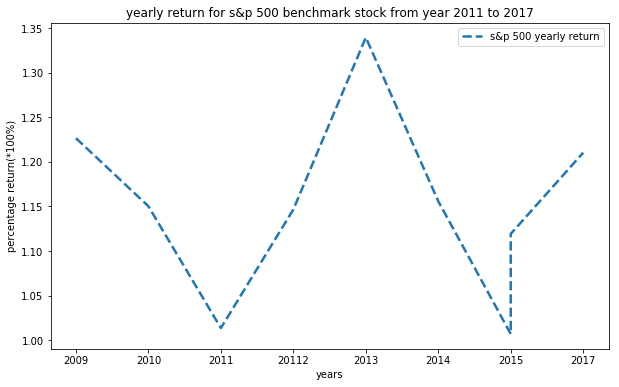

In [48]:
xvalues = ['2009','2010', '2011', '20112', '2013', '2014', '2015', '2015','2017']

plt.figure(figsize=(10,6))
plt.title('yearly return for s&p 500 benchmark stock from year 2011 to 2017')
plt.plot(xvalues, SP500_Yearly_returns, '--', label = 's&p 500 yearly return', linewidth = 2.5)
plt.xlabel('years')
plt.ylabel('percentage return(*100%)')
plt.legend()
plt.show()

In [49]:
print('SP500 Yearky returns are:')
print(SP500_Yearly_returns)
print()
print('Cumulative SP500 Returns:')
print(np.product(SP500_Yearly_returns))

SP500 Yearky returns are:
[1.2265477794743096, 1.150286588655969, 1.0137522226092486, 1.146640017814359, 1.3394466860113836, 1.1559005347535514, 1.0071227327917, 1.1193110165747677, 1.2103208013135276]

Cumulative SP500 Returns:
3.464407835870384


The above shows Cumulative Return for SP500 stocks for years 2009 to 2017

#### Testing Period

In [50]:
spytest = pd.read_csv('C:/Users/Dhruv/Desktop/Semester 4/Statistical Arbitrage/Stat Project/Data/GSPCtest.csv',
                  index_col='Date',na_values=0,keep_default_na=True)
spytest.dropna(axis = 0, inplace = True)
spytest = spytest['Adj Close']
spytest.size

251

In [51]:
SP500testret = ((spytest[250] - spytest[0])/spytest[0])*100
print('SP500 Returns for thtesting Peiod ie. 2018 is :')
print(SP500testret)

SP500 Returns for thtesting Peiod ie. 2018 is :
-7.009394462683101


# Final Result for testing period (2018):
    
    SP500 Benchamark gives returns of -7%
    While our Strategy gives returns of around +9%

#                 Project Over, Thank You

 Extra Part (Rough)
 
 Rolling Window Calulations

In [52]:
#for i in [0,251,502,753,1004,1255,1506,1757,2008,2259]:
dd =[]
for i in [0,753,1506,2259]:
    for pr in p:
        if i != 2259:
            temper = []
            a = tradingrules(residual=residualdf[i:i+753][pr],mean=np.mean(residualdf[i:i+753][pr]),standev=np.std(residualdf[i:i+753][pr]),openstdev=1,closestdev=0.2,stoploss=2.5)
            temper.append(a)

            print('----------------------------------------------------------------------------------------------')
    dd.append(np.product(temper))   
dd




Standard Deviation considered are: Trading Postion Opens at-  1 , Trading Postion Closes at  0.2 , Trading Postion Closes if it breaches  2.5  to avoid further loss.

Trading Frequency:  1
Success Ratio:  1.0
Maximum Drawdown: 0.7060879960477933
Net P/L:  1.0755818266684913
Average P/L: 0.00030112281541231603
----------------------------------------------------------------------------------------------


Standard Deviation considered are: Trading Postion Opens at-  1 , Trading Postion Closes at  0.2 , Trading Postion Closes if it breaches  2.5  to avoid further loss.

Trading Frequency:  2
Success Ratio:  1.0
Maximum Drawdown: 0.24427503120539562
Net P/L:  1.017299345340866
Average P/L: 6.892169458512374e-05
----------------------------------------------------------------------------------------------


Standard Deviation considered are: Trading Postion Opens at-  1 , Trading Postion Closes at  0.2 , Trading Postion Closes if it breaches  2.5  to avoid further loss.

Trading Frequenc

[1.0065492796438367, 0, 0, 0]